In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from matplotlib.colors import ListedColormap

In [2]:
data=pd.read_csv('Social_Network_Ads.csv')
x=data.iloc[:,:-1].values
y=data.iloc[:,-1].values
data.describe()

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


In [3]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.7,random_state=2)

In [4]:
stansc=StandardScaler()

In [5]:
x_train=stansc.fit_transform(x_train)
x_test=stansc.fit_transform(x_test)


In [6]:
knn_model=KNeighborsClassifier(n_neighbors=5,p=2)
knn_model.fit(x_train,y_train)

KNeighborsClassifier()

In [7]:
y_pred=knn_model.predict(x_test)

In [8]:
conm=metrics.confusion_matrix(y_test,y_pred)
score=metrics.accuracy_score(y_test,y_pred)
conm

array([[72,  5],
       [ 5, 38]], dtype=int64)

C:\Users\we\AppData\Local\Temp\ipykernel_12456\1142874225.py:9: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)


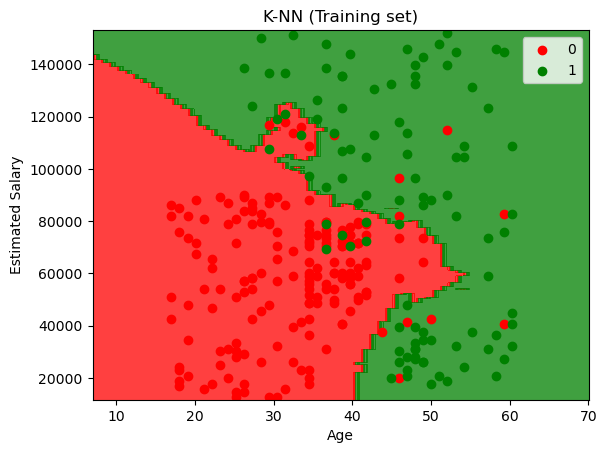

In [9]:
X_set, y_set = stansc.inverse_transform(x_train), y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 1),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 1))
plt.contourf(X1, X2, knn_model.predict(stansc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('K-NN (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()